In [124]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from scikitplot.estimators import plot_learning_curve
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt
from pandas import get_dummies

In [140]:
df = pd.read_csv("df_clean.csv")
df

Unnamed: 0  Unnamed: 0.1  OSEBuildingID  DataYear  ZipCode  Latitude  \
0             1             1              2      2016  98101.0  47.61317   
1             4             4              8      2016  98121.0  47.61375   
2            34            34             43      2016  98108.0  47.53493   
3            43            43             57      2016  98101.0  47.61130   
4            47            47             62      2016  98101.0  47.61233   
..          ...           ...            ...       ...      ...       ...   
154        1598          1598          49737      2016  98109.0  47.62503   
155        1601          1601          49776      2016  98121.0  47.61156   
156        1609          1609          49802      2016  98107.0  47.66629   
157        1644          1644          50054      2016  98109.0  47.62251   
158        1645          1645          50062      2016  98103.0  47.65476   

     Longitude  YearBuilt  NumberofBuildings  NumberofFloors  ...  \
0   -122.33393       1996                1.0              11  ...   
1   -122.34047       1980                1.0              18  ...   
2   -122.31788       1992                1.0               3  ...   
3   -122.33659       1973                1.0               5  ...   
4   -122.33432       1930                1.0              20  ...   
..         ...        ...                ...             ...  ...   
154 -122.35642       1918                1.0               3  ...   
155 -122.34401       1988                1.0              13  ...   
156 -122.38260       2013                1.0               4  ...   
157 -122.33390       2014                1.0              13  ...   
158 -122.34732       2014                1.0               4  ...   

     ThirdLargestPropertyUseType_Refrigerated Warehouse  \
0                                                    0    
1                                                    0    
2                                                    0    
3                                                    0    
4                                                    0    
..                                                 ...    
154                                                  0    
155                                                  0    
156                                                  0    
157                                                  0    
158                                                  0    

     ThirdLargestPropertyUseType_Restaurant  \
0                                         1   
1                                         0   
2                                         0   
3                                         0   
4                                         1   
..                                      ...   
154                                       0   
155                                       0   
156                                       0   
157                                       0   
158                                       0   

     ThirdLargestPropertyUseType_Retail Store  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
..                                        ...   
154                                         0   
155                                         0   
156                                         0   
157                                         1   
158                                         0   

     ThirdLargestPropertyUseType_Self-Storage Facility  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
..                                      

In [141]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder

In [142]:
LabelEncoder

sklearn.preprocessing._label.LabelEncoder

In [143]:
X = df.drop(["GHGEmissionsIntensity"], axis=1)

In [144]:
y = df.GHGEmissionsIntensity

In [145]:
X_train , X_test , y_train ,  y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [146]:
X_train.shape

(127, 588)

In [147]:
y_train.shape

(127,)

In [148]:
preprocessing_ss = Pipeline(steps=[
    ('normal' , StandardScaler() )
])

# LOGISTIC REGRESSION

In [149]:
pipeline_LR  = Pipeline(steps = [['preprocess_standard_scaler' , preprocessing_ss], 
                                ['model_logistic_regression' , LogisticRegression()]
                                ])

                                     

In [150]:
pipeline_LR.fit(X_train , y_train)

ValueError: Unknown label type: 'continuous'

In [135]:
print("accuracy train : %.3f"%pipeline_LR.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_LR.score(X_test , y_test))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [136]:
y_pred_LR = pipeline_LR.predict(X_test)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [73]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       2.0
          28       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       0.0
          35       0.00      0.00      0.00       0.0
          37       0.00      0.00      0.00       1.0

    accuracy                           0.00      10.0
   macro avg       0.00   

C:\Users\edenl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edenl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edenl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edenl\anaconda3\lib\site-packages\sklearn\metrics\_cla

ValueError: n_splits=5 cannot be greater than the number of members in each class.

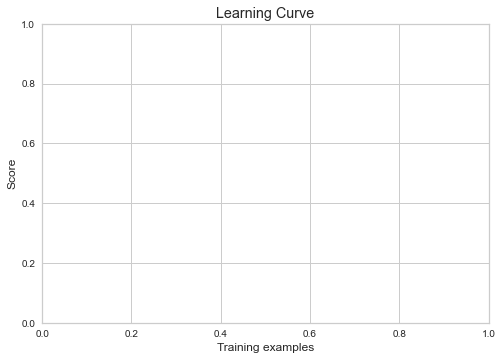

In [77]:
plot_learning_curve(pipeline_LR, X , y)

ValueError: Found input variables with inconsistent numbers of samples: [90, 310]

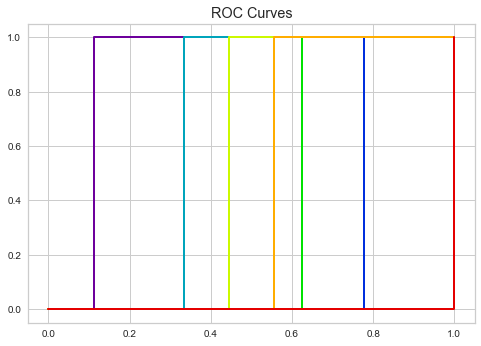

In [94]:
pipeline_LR.fit(X_train, y_train)
y_probas_LR = pipeline_LR.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_LR)
#it's bad sense we can't see the lignes going up 

In [ ]:
cm = confusion_matrix(y_test, y_pred_LinearR)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

# DECISSION TREE CLASSIFIER

In [81]:
pipeline_DTC = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                
                                ['classifier', DecisionTreeClassifier()]
                                     ])

In [84]:
pipeline_DTC.fit(X_train , y_train)

Pipeline(steps=[('preprocessing_Standard_scaler',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['classifier', DecisionTreeClassifier()]])

In [85]:
print("accuracy train : %.3f"%pipeline_DTC.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_DTC.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.000


In [86]:
y_pred_DTC = pipeline_DTC.predict(X_test)
y_pred_DTC

array([30, 18, 18, 31, 14, 22, 34,  1, 15, 24], dtype=int64)

In [88]:
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       0.0
          24       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       2.0
          28       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       0.0
          31       0.00      0.00      0.00       0.0
          34       0.00      0.00      0.00       0.0
          37       0.00      0.00      0.00       1.0

    accuracy              

C:\Users\edenl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edenl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edenl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edenl\anaconda3\lib\site-packages\sklearn\metrics\_cla

ValueError: n_splits=5 cannot be greater than the number of members in each class.

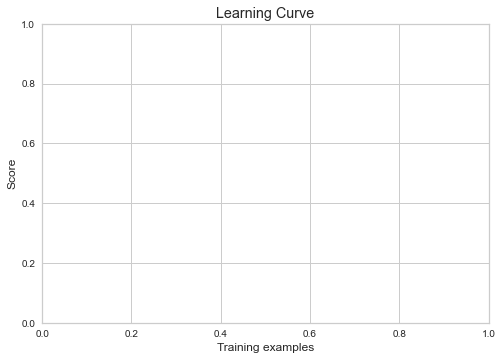

In [90]:
plot_learning_curve(pipeline_DTC, X , y)

ValueError: Found input variables with inconsistent numbers of samples: [90, 310]

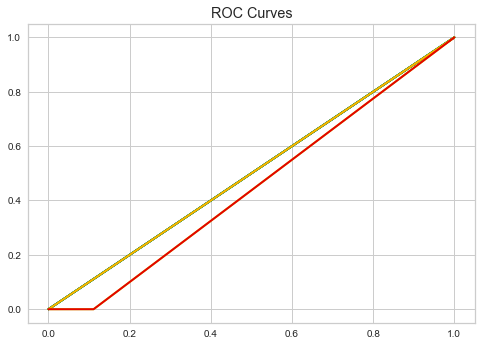

In [95]:
pipeline_DTC.fit(X_train, y_train)
y_probas_DTC = pipeline_DTC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_DTC)
#it's bad sense we can't see the lignes going up 

In [ ]:
cm = confusion_matrix(y_test, y_pred_LinearR)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

# LINEARRGRESSION

In [103]:
pipeline_LinearR= Pipeline(steps = [['standard scaler', preprocessing_ss],
                                    ['classiffier', LinearRegression()]
                                     ])

In [104]:
pipeline_LinearR.fit(X_train,y_train)

Pipeline(steps=[('standard scaler',
                 Pipeline(steps=[('normal', StandardScaler())])),
                ['classiffier', LinearRegression()]])

In [105]:
print("accuracy train : %.3f"%pipeline_LinearR.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_LinearR.score(X_test , y_test))

accuracy train : 0.990
accuracy test : -1.759


In [106]:
y_pred_LinearR = pipeline_LinearR.predict(X_test)
y_pred_LinearR

array([33.77099435, -4.69389079, 28.70263128, 21.48109503, 28.13870475,
       60.43129568, 23.09442375, -5.62870157, 31.25469474,  4.75897649])

In [107]:
print(classification_report(y_test, y_pred_LinearR))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

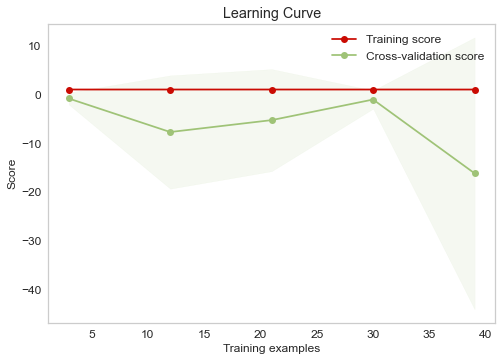

In [108]:
plot_learning_curve(pipeline_LinearR, X , y)


In [109]:
pipeline_LinearR.fit(X_train, y_train)
y_probas_LinearR = pipeline_LinearR.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_LinearR)

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [110]:
cm = confusion_matrix(y_test, y_pred_LinearR)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets